In [ ]:
!pip install pandas numpy matplotlib seaborn plotly




In [ ]:
import os
os.listdir()


['.config',
 'List of Orders.csv',
 '.ipynb_checkpoints',
 'Sales target.csv',
 'Order Details.csv',
 'sample_data']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

print("Environment Ready ")


Environment Ready 


In [ ]:
orders = pd.read_csv("List of Orders.csv")
details = pd.read_csv("Order Details.csv")
targets = pd.read_csv("Sales target.csv")


In [ ]:
orders.head()


,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [ ]:
details.head()


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [ ]:
targets.head()


,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [ ]:
orders.columns
details.columns
targets.columns


Index(['Month of Order Date', 'Category', 'Target'], dtype='object')

In [ ]:
# Merge Orders + Order Details
df = pd.merge(orders, details, on="Order ID")

df.head()


,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


df.shape
df.info()
df.head()


In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


In [20]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


In [21]:
df[['Order Date','Year','Month']].head()


,Order Date,Year,Month
0,2018-04-01,2018,4
1,2018-04-01,2018,4
2,2018-04-01,2018,4
3,2018-04-01,2018,4
4,2018-04-01,2018,4


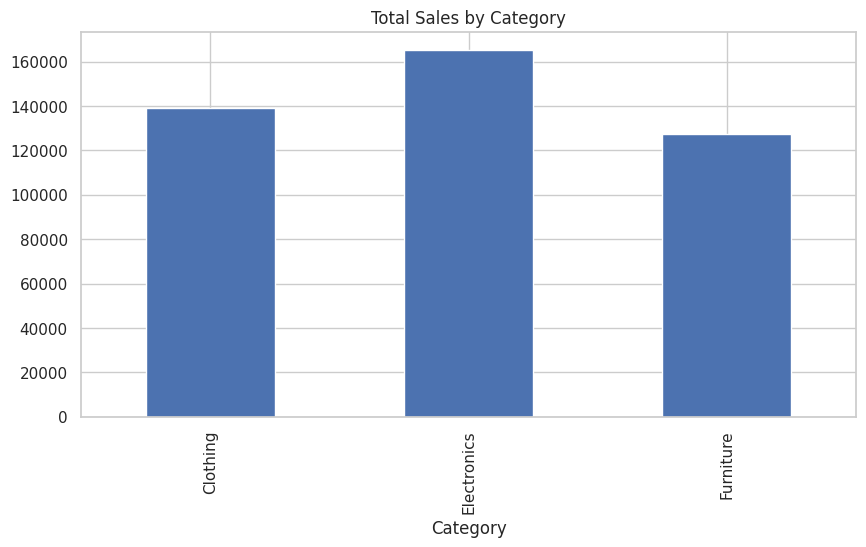

In [22]:
df.groupby("Category")["Amount"].sum().plot(kind="bar")
plt.title("Total Sales by Category")
plt.show()


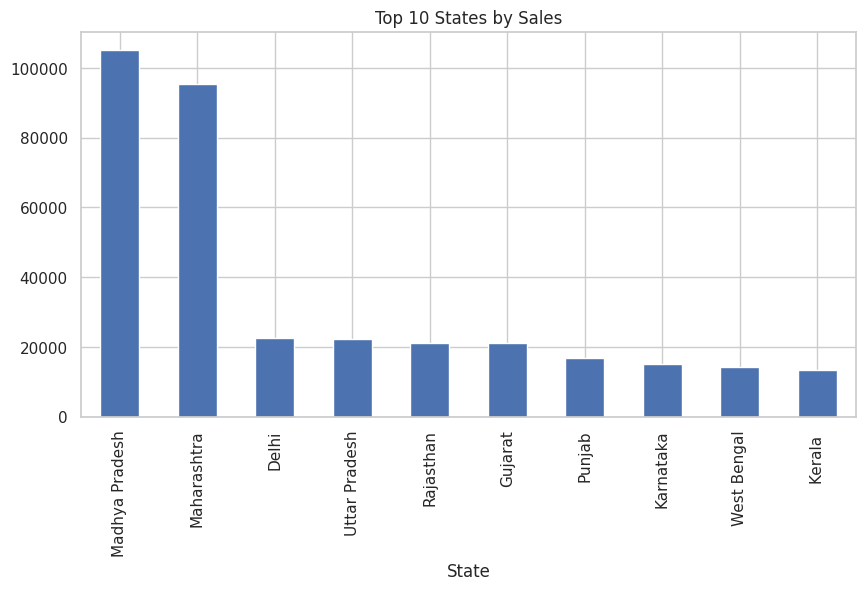

In [23]:
top_states = df.groupby("State")["Amount"].sum().sort_values(ascending=False).head(10)
top_states.plot(kind="bar")
plt.title("Top 10 States by Sales")
plt.show()


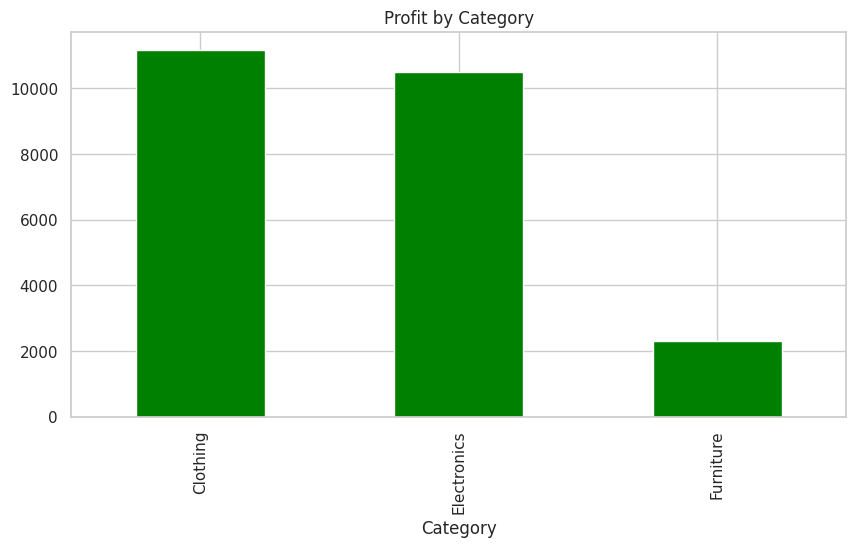

In [24]:
df.groupby("Category")["Profit"].sum().plot(kind="bar", color="green")
plt.title("Profit by Category")
plt.show()


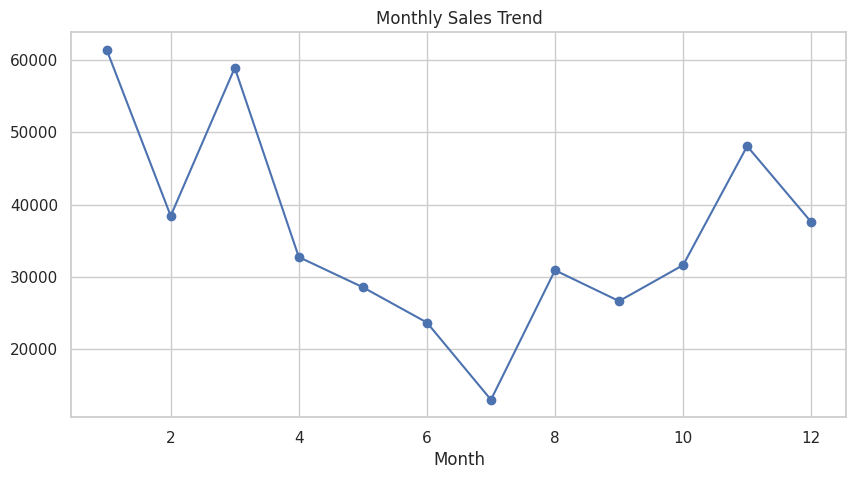

In [25]:
df.groupby("Month")["Amount"].sum().plot(marker='o')
plt.title("Monthly Sales Trend")
plt.show()


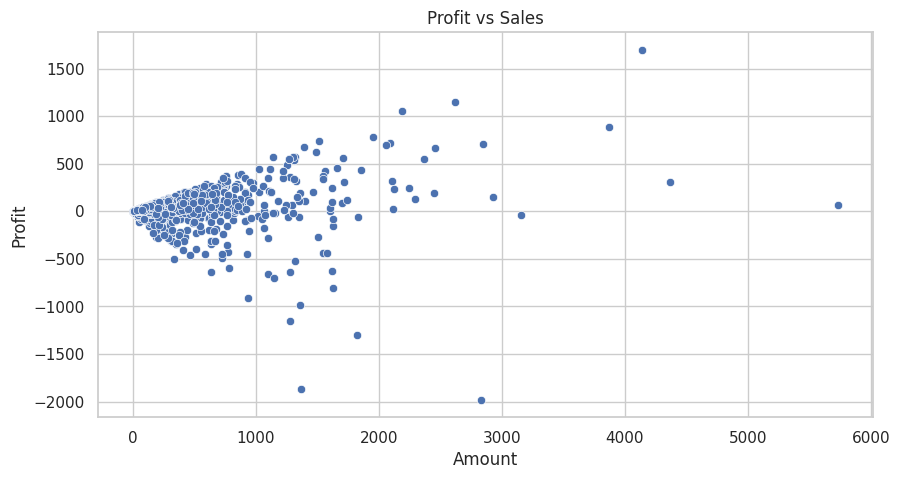

In [26]:
sns.scatterplot(x="Amount", y="Profit", data=df)
plt.title("Profit vs Sales")
plt.show()


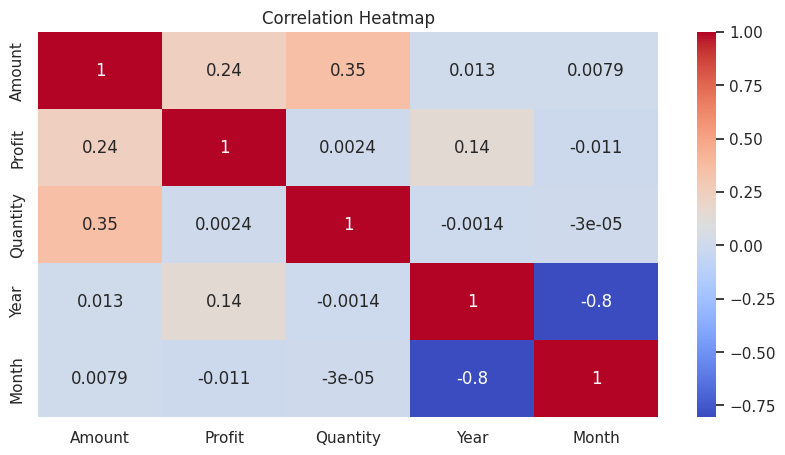

In [27]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [28]:
total_sales = df['Amount'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print("Total Sales ₹:", total_sales)
print("Total Profit ₹:", total_profit)
print("Total Orders:", total_orders)


Total Sales ₹: 431502.0
Total Profit ₹: 23955.0
Total Orders: 500
